# Introduction to this python notebook

In [ ]:
"""
What? Early stopping of Gradient Boosting

Early stopping support in Gradient Boosting enables us to find the least number of iterations which is sufficient 
to build a model that generalizes well to unseen data.

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-early-stopping-py
"""

# Import python modules

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Import/create dataset

In [2]:
data_list = [datasets.load_iris(), datasets.load_digits()]
data_list = [(d.data, d.target) for d in data_list]
data_list += [datasets.make_hastie_10_2()]
names = ['Iris Data', 'Digits Data', 'Hastie Data']

# Create models

In [3]:
n_gb = []
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

n_estimators = 500

for X, y in data_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=0)

    # We specify that if the scores don't improve by atleast 0.01 for the last
    # 10 stages, stop fitting additional stages
    gbes = ensemble.GradientBoostingClassifier(n_estimators=n_estimators,
                                               validation_fraction=0.2,
                                               n_iter_no_change=10, tol=0.01,
                                               random_state=0)
    gb = ensemble.GradientBoostingClassifier(n_estimators=n_estimators,
                                             random_state=0)
    start = time.time()
    gb.fit(X_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    time_gbes.append(time.time() - start)

    score_gb.append(gb.score(X_test, y_test))
    score_gbes.append(gbes.score(X_test, y_test))

    n_gb.append(gb.n_estimators_)
    n_gbes.append(gbes.n_estimators_)

bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

# Compare scores with and without early stopping

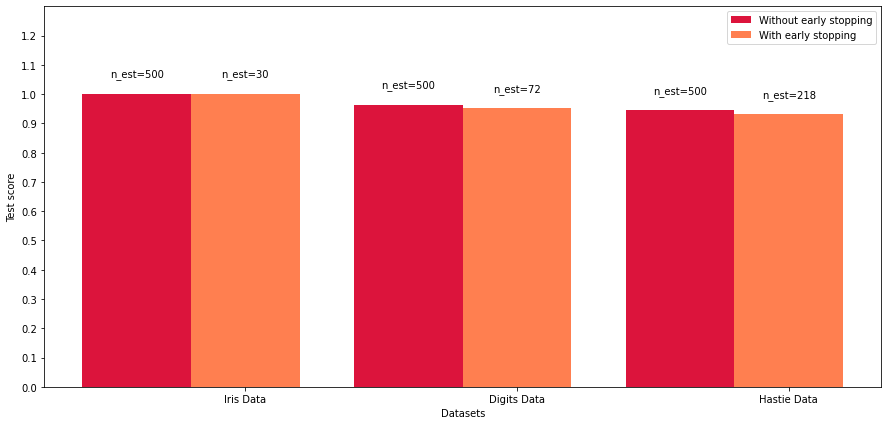

In [4]:
plt.figure(figsize=(15, 7))

bar1 = plt.bar(index, score_gb, bar_width, label='Without early stopping',
               color='crimson')
bar2 = plt.bar(index + bar_width, score_gbes, bar_width,
               label='With early stopping', color='coral')

plt.xticks(index + bar_width, names)
plt.yticks(np.arange(0, 1.3, 0.1))


def autolabel(rects, n_estimators):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(rect.get_x() + rect.get_width() / 2.,
                 1.05 * rect.get_height(), 'n_est=%d' % n_estimators[i],
                 ha='center', va='bottom')


autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3])
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('Datasets')
plt.ylabel('Test score')
plt.show()

# Compare fit times with and without early stopping

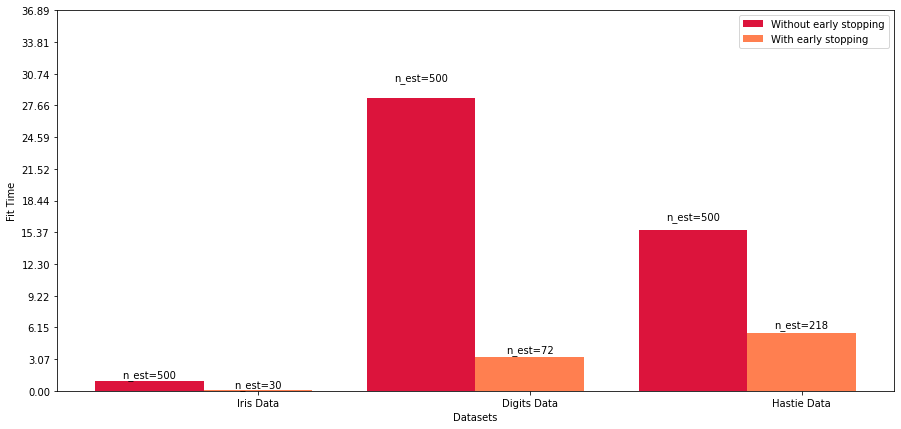

In [5]:
plt.figure(figsize=(15, 7))

bar1 = plt.bar(index, time_gb, bar_width, label='Without early stopping',
               color='crimson')
bar2 = plt.bar(index + bar_width, time_gbes, bar_width,
               label='With early stopping', color='coral')

max_y = np.amax(np.maximum(time_gb, time_gbes))

plt.xticks(index + bar_width, names)
plt.yticks(np.linspace(0, 1.3 * max_y, 13))

autolabel(bar1, n_gb)
autolabel(bar2, n_gbes)

plt.ylim([0, 1.3 * max_y])
plt.legend(loc='best')
plt.grid(False)
plt.xlabel('Datasets')
plt.ylabel('Fit Time')
plt.show()

In [6]:
"""
This example illustrates how the early stopping can used in the GradientBoostingClassifier model to achieve
almost the same accuracy as compared to a model built without early stopping using many fewer estimators. 
This can significantly reduce training time, memory usage and prediction latency.
"""

'\nThis example illustrates how the early stopping can used in the GradientBoostingClassifier model to achieve\nalmost the same accuracy as compared to a model built without early stopping using many fewer estimators. \nThis can significantly reduce training time, memory usage and prediction latency.\n'